In [289]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [290]:
# Imports
import numpy as np
import pandas as pd

import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [291]:
# Load data from Colab file system
pesticides_data = pd.read_csv('/content/drive/MyDrive/pesticides_1.csv')
rainfall_data = pd.read_csv('/content/drive/MyDrive/rainfall.csv')
temperature_data = pd.read_csv('/content/drive/MyDrive/newTemperature.csv')
yield_data = pd.read_csv('/content/drive/MyDrive/yield.csv')
land_data = pd.read_csv('/content/drive/MyDrive/land_use.csv')
population_data = pd.read_csv('/content/drive/MyDrive/population.csv')
energy_data = pd.read_csv('/content/drive/MyDrive/EnergyUse.csv')

In [292]:
rainfall_data = rainfall_data.rename(columns={' Country': 'Country', ' Year':'Year', ' ISO3':'ISO3'})

In [293]:
yield_data = yield_data.rename(columns={'Area': 'Country','Value':'TotalYield'})

In [294]:
temperature_data = temperature_data.rename(columns={'Area': 'Country', ' Year':'Year', ' ISO3':'ISO3'})

In [295]:
energy_data=energy_data.rename(columns={'Area': 'Country', 'Year':'Year','Item':'TypeofEnergy','Value':'EnergyUse'})

In [296]:
energy_data=energy_data[['Country','Year','TypeofEnergy','EnergyUse']]

In [297]:
energy_data

,Country,Year,TypeofEnergy,EnergyUse
0,Afghanistan,1991,Electricity,100.8
1,Afghanistan,1992,Electricity,79.2
2,Afghanistan,1993,Electricity,75.6
3,Afghanistan,1994,Electricity,72.0
4,Afghanistan,1995,Electricity,64.8
...,...,...,...,...
13782,Zimbabwe,2012,Electricity,1886.4
13783,Zimbabwe,2013,Electricity,3196.8
13784,Zimbabwe,2014,Electricity,2473.2
13785,Zimbabwe,2015,Electricity,3499.2


In [298]:
unique_Energy = energy_data['TypeofEnergy'].unique()
print(len(unique_Energy))

5


In [299]:
land_data = land_data.rename(columns={'Area': 'Country','Value':'LandArea'})

In [300]:
population_data = population_data.rename(columns={'Area': 'Country','Value':'Population'})

In [301]:
pesticides_data = pesticides_data.rename(columns={'Area': 'Country','Value':'Tonnes'})

In [302]:
temperature_data

,Domain Code,Domain,Area Code (M49),Country,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7001,January,1991,1991,°c,0.161,E,Estimated value
1,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7001,January,1992,1992,°c,0.753,E,Estimated value
2,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7001,January,1993,1993,°c,-0.849,E,Estimated value
3,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7001,January,1994,1994,°c,1.171,E,Estimated value
4,ET,Temperature change on land,4,Afghanistan,7271,Temperature change,7001,January,1995,1995,°c,1.339,E,Estimated value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73711,ET,Temperature change on land,716,Zimbabwe,7271,Temperature change,7012,December,2012,2012,°c,0.074,E,Estimated value
73712,ET,Temperature change on land,716,Zimbabwe,7271,Temperature change,7012,December,2013,2013,°c,-0.321,E,Estimated value
73713,ET,Temperature change on land,716,Zimbabwe,7271,Temperature change,7012,December,2014,2014,°c,0.664,E,Estimated value
73714,ET,Temperature change on land,716,Zimbabwe,7271,Temperature change,7012,December,2015,2015,°c,2.714,E,Estimated value


In [303]:
temperature_data = temperature_data.groupby(['Country', 'Year'])['Value'].mean().reset_index()


In [304]:
# Group the rainfall data by 'Country' and 'Year' and calculate total rainfall for each year
rainfall_data=rainfall_data.groupby(['Country', 'Year'])['Rainfall - (MM)'].sum().reset_index()

In [305]:
rainfall_data

,Country,Year,Rainfall - (MM)
0,Afghanistan,1901,250.92364
1,Afghanistan,1902,219.29715
2,Afghanistan,1903,314.51900
3,Afghanistan,1904,298.78614
4,Afghanistan,1905,270.13797
...,...,...,...
22731,Zimbabwe,2012,543.74841
22732,Zimbabwe,2013,614.81309
22733,Zimbabwe,2014,607.29762
22734,Zimbabwe,2015,390.63457


In [306]:
# Get unique country names from yield_data
unique_countries = yield_data['Year'].unique()

# Print the unique country names
print(len(unique_countries))

59


In [307]:
# Get unique country names from yield_data
unique_countries = temperature_data['Year'].unique()

# Print the unique country names
print(len(unique_countries))

26


In [308]:
temperature_data

,Country,Year,Value
0,Afghanistan,1991,0.138333
1,Afghanistan,1992,-0.185917
2,Afghanistan,1993,0.163000
3,Afghanistan,1994,0.469667
4,Afghanistan,1995,0.379167
...,...,...,...
6138,Zimbabwe,2012,0.456167
6139,Zimbabwe,2013,0.186500
6140,Zimbabwe,2014,0.229500
6141,Zimbabwe,2015,1.114167


In [309]:
# Filter yield_data
yield_data = yield_data[(yield_data['Year'] >= 1991) & (yield_data['Year'] <= 2016)]

# Filter temperature_yearly
temperature_data = temperature_data[(temperature_data['Year'] >= 1991) & (temperature_data['Year'] <= 2016)]

# Filter rainfall_yearly
rainfall_data = rainfall_data[(rainfall_data['Year'] >= 1991) & (rainfall_data['Year'] <= 2016)]


In [310]:
rainfall_data

,Country,Year,Rainfall - (MM)
90,Afghanistan,1991,435.44990
91,Afghanistan,1992,408.15623
92,Afghanistan,1993,317.08530
93,Afghanistan,1994,342.22238
94,Afghanistan,1995,300.89815
...,...,...,...
22731,Zimbabwe,2012,543.74841
22732,Zimbabwe,2013,614.81309
22733,Zimbabwe,2014,607.29762
22734,Zimbabwe,2015,390.63457


In [311]:
yield_data

,Domain,Country,Element,Item,Year,Unit,TotalYield
30,Crops,Afghanistan,Yield,Barley,1991,hg/ha,10637
31,Crops,Afghanistan,Yield,Barley,1992,hg/ha,8000
32,Crops,Afghanistan,Yield,Barley,1993,hg/ha,10000
33,Crops,Afghanistan,Yield,Barley,1994,hg/ha,9200
34,Crops,Afghanistan,Yield,Barley,1995,hg/ha,8889
...,...,...,...,...,...,...,...
63683,Crops,Zimbabwe,Yield,Wheat,2012,hg/ha,24902
63684,Crops,Zimbabwe,Yield,Wheat,2013,hg/ha,23429
63685,Crops,Zimbabwe,Yield,Wheat,2014,hg/ha,22150
63686,Crops,Zimbabwe,Yield,Wheat,2015,hg/ha,20486


In [312]:
# Remove whitespace from country names in rainfall_data
rainfall_data['Country'] = rainfall_data['Country'].str.strip()

<ipython-input-312-b24e15ee6e2d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rainfall_data['Country'] = rainfall_data['Country'].str.strip()


In [313]:
temperature_data['Country'] = temperature_data['Country'].str.strip()

In [314]:
# Perform a left join on 'Country' and 'Year'
merged_data = yield_data.merge(rainfall_data, on=['Country', 'Year'], how='inner')


In [315]:
merged_data = merged_data.merge(temperature_data, on=['Country', 'Year'], how='inner')

In [316]:
# Select relevant columns from pesticides_data
pesticides_data = pesticides_data[['Country', 'Year', 'Tonnes']]



In [317]:
merged_data = merged_data.merge(pesticides_data, on=['Country', 'Year'], how='inner')

In [318]:
population_data=population_data[['Country', 'Year', 'Population']]

In [319]:
land_data=land_data[['Country', 'Year', 'LandArea']]

In [320]:
merged_data = merged_data.merge(population_data, on=['Country', 'Year'], how='inner')

In [321]:
merged_data = merged_data.merge(land_data, on=['Country', 'Year'], how='inner')

In [322]:
energy_data = energy_data[['Country','Year','TypeofEnergy','EnergyUse']]
merged_data = merged_data.merge(energy_data, on=['Country', 'Year'], how='inner')

In [323]:
# merged_data = merged_data.merge(energy_data, on=['Country', 'Year'], how='inner')

In [324]:
merged_data = merged_data.drop(['Domain', 'Element', 'Unit'], axis=1)


In [325]:
merged_data

,Country,Item,Year,TotalYield,Rainfall - (MM),Value,Tonnes,Population,LandArea,TypeofEnergy,EnergyUse
0,Albania,Barley,1991,9231,917.86880,-0.471,121.00,3302.081,1127.0,Petroleum products,2700.1744
1,Albania,Barley,1991,9231,917.86880,-0.471,121.00,3302.081,1127.0,Natural gas,800.0000
2,Albania,Barley,1991,9231,917.86880,-0.471,121.00,3302.081,1127.0,Electricity,810.0000
3,Albania,Barley,1991,9231,917.86880,-0.471,121.00,3302.081,1127.0,Petroleum products,2700.1744
4,Albania,Barley,1991,9231,917.86880,-0.471,121.00,3302.081,1127.0,Natural gas,800.0000
...,...,...,...,...,...,...,...,...,...,...,...
144233,Zimbabwe,Wheat,2016,19013,455.13295,1.104,2185.07,14452.704,16200.0,Coal,1161.0000
144234,Zimbabwe,Wheat,2016,19013,455.13295,1.104,2185.07,14452.704,16200.0,Electricity,1771.2000
144235,Zimbabwe,Wheat,2016,19013,455.13295,1.104,2185.07,14452.704,16200.0,Petroleum products,4230.4000
144236,Zimbabwe,Wheat,2016,19013,455.13295,1.104,2185.07,14452.704,16200.0,Coal,1161.0000


In [326]:
# Save merged_data to an Excel file
merged_data.to_excel('merged_data.xlsx', index=False)

In [327]:
# Count null values in 'Value_y' column
null_count_value_y = merged_data['Tonnes'].isnull().sum()

# Print the null count
print("Number of null values in 'Value_y':", null_count_value_y)

Number of null values in 'Value_y': 0


In [328]:
unique_rows = merged_data.drop_duplicates()


In [329]:
unique_rows

,Country,Item,Year,TotalYield,Rainfall - (MM),Value,Tonnes,Population,LandArea,TypeofEnergy,EnergyUse
0,Albania,Barley,1991,9231,917.86880,-0.471,121.00,3302.081,1127.0,Petroleum products,2700.1744
1,Albania,Barley,1991,9231,917.86880,-0.471,121.00,3302.081,1127.0,Natural gas,800.0000
2,Albania,Barley,1991,9231,917.86880,-0.471,121.00,3302.081,1127.0,Electricity,810.0000
6,Albania,Carrots and turnips,1991,150000,917.86880,-0.471,121.00,3302.081,1127.0,Petroleum products,2700.1744
7,Albania,Carrots and turnips,1991,150000,917.86880,-0.471,121.00,3302.081,1127.0,Natural gas,800.0000
...,...,...,...,...,...,...,...,...,...,...,...
144227,Zimbabwe,Sweet potatoes,2016,27283,455.13295,1.104,2185.07,14452.704,16200.0,Coal,1161.0000
144228,Zimbabwe,Sweet potatoes,2016,27283,455.13295,1.104,2185.07,14452.704,16200.0,Electricity,1771.2000
144232,Zimbabwe,Wheat,2016,19013,455.13295,1.104,2185.07,14452.704,16200.0,Petroleum products,4230.4000
144233,Zimbabwe,Wheat,2016,19013,455.13295,1.104,2185.07,14452.704,16200.0,Coal,1161.0000


In [330]:
import pandas as pd

# Assign column names based on the structure of your data
unique_rows.columns = ['Country', 'Item', 'Year', 'TotalYield', 'Rainfall - (MM)', 'Value', 'Tonnes', 'Population', 'LandArea', 'TypeofEnergy', 'EnergyUse']

# Aggregate the data and calculate total energy used
aggregated_data = unique_rows.groupby(['Country', 'Item', 'Year']).agg({
    'TotalYield': 'first',
    'Rainfall - (MM)': 'first',
    'Value': 'first',
    'Tonnes': 'first',
    'Population': 'first',
    'LandArea': 'first',
    'EnergyUse': 'sum'
}).reset_index()

# Rename the EnergyUse column to TotalEnergyUsed
aggregated_data.rename(columns={'EnergyUse': 'TotalEnergyUsed'}, inplace=True)

# Reorder columns to match the specified structure
column_order = ['Country', 'Item', 'Year', 'TotalYield', 'Rainfall - (MM)', 'Value', 'Tonnes', 'Population', 'LandArea', 'TotalEnergyUsed']
unique_rows = aggregated_data[column_order]

# Save the processed data to a new CSV file
output_file = 'processed_data.csv'
unique_rows.to_csv(output_file, index=False)

print(f"Data has been processed and saved to {output_file}")
print("\nFirst few rows of processed data:")
print(unique_rows.head())

Data has been processed and saved to processed_data.csv

First few rows of processed data:
   Country    Item  Year  TotalYield  Rainfall - (MM)     Value  Tonnes  \
0  Albania  Barley  1991        9231        917.86880 -0.471000   121.0   
1  Albania  Barley  1992       13802        797.69610  0.321500   121.0   
2  Albania  Barley  1993       13324        861.27477  0.305500   121.0   
3  Albania  Barley  1994       23523       1006.21230  1.232417   201.0   
4  Albania  Barley  1995       22527       1076.81184 -0.003250   251.0   

   Population  LandArea  TotalEnergyUsed  
0    3302.081    1127.0        4310.1744  
1    3303.739    1127.0        3385.2816  
2    3300.711    1126.0        2315.1308  
3    3293.999    1126.0        1467.8822  
4    3284.364    1127.0        3844.7500  


In [331]:
unique_rows

,Country,Item,Year,TotalYield,Rainfall - (MM),Value,Tonnes,Population,LandArea,TotalEnergyUsed
0,Albania,Barley,1991,9231,917.86880,-0.471000,121.00,3302.081,1127.0,4310.1744
1,Albania,Barley,1992,13802,797.69610,0.321500,121.00,3303.739,1127.0,3385.2816
2,Albania,Barley,1993,13324,861.27477,0.305500,121.00,3300.711,1126.0,2315.1308
3,Albania,Barley,1994,23523,1006.21230,1.232417,201.00,3293.999,1126.0,1467.8822
4,Albania,Barley,1995,22527,1076.81184,-0.003250,251.00,3284.364,1127.0,3844.7500
...,...,...,...,...,...,...,...,...,...,...
24950,Zimbabwe,Wheat,2012,24902,543.74841,0.456167,3375.53,13265.331,16200.0,14203.4000
24951,Zimbabwe,Wheat,2013,23429,614.81309,0.186500,2550.07,13555.422,16200.0,10158.6000
24952,Zimbabwe,Wheat,2014,22150,607.29762,0.229500,2185.07,13855.753,16200.0,9147.3000
24953,Zimbabwe,Wheat,2015,20486,390.63457,1.114167,2185.07,14154.937,16200.0,9744.6000


In [332]:
# Check for null values
final_data=unique_rows
null_counts = final_data.isnull().sum()

# Display the count of null values for each column
print("Null value counts for each column:")
print(null_counts)


Null value counts for each column:
Country              0
Item                 0
Year                 0
TotalYield           0
Rainfall - (MM)      0
Value              210
Tonnes               0
Population           0
LandArea             0
TotalEnergyUsed      0
dtype: int64


In [333]:
# Remove rows where 'Value' is null
final_data = final_data.dropna(subset=['Value'])

In [334]:
# Check for null values
null_counts = final_data.isnull().sum()

# Display the count of null values for each column
print("Null value counts for each column:")
print(null_counts)

Null value counts for each column:
Country            0
Item               0
Year               0
TotalYield         0
Rainfall - (MM)    0
Value              0
Tonnes             0
Population         0
LandArea           0
TotalEnergyUsed    0
dtype: int64


In [335]:
final_data

,Country,Item,Year,TotalYield,Rainfall - (MM),Value,Tonnes,Population,LandArea,TotalEnergyUsed
0,Albania,Barley,1991,9231,917.86880,-0.471000,121.00,3302.081,1127.0,4310.1744
1,Albania,Barley,1992,13802,797.69610,0.321500,121.00,3303.739,1127.0,3385.2816
2,Albania,Barley,1993,13324,861.27477,0.305500,121.00,3300.711,1126.0,2315.1308
3,Albania,Barley,1994,23523,1006.21230,1.232417,201.00,3293.999,1126.0,1467.8822
4,Albania,Barley,1995,22527,1076.81184,-0.003250,251.00,3284.364,1127.0,3844.7500
...,...,...,...,...,...,...,...,...,...,...
24950,Zimbabwe,Wheat,2012,24902,543.74841,0.456167,3375.53,13265.331,16200.0,14203.4000
24951,Zimbabwe,Wheat,2013,23429,614.81309,0.186500,2550.07,13555.422,16200.0,10158.6000
24952,Zimbabwe,Wheat,2014,22150,607.29762,0.229500,2185.07,13855.753,16200.0,9147.3000
24953,Zimbabwe,Wheat,2015,20486,390.63457,1.114167,2185.07,14154.937,16200.0,9744.6000


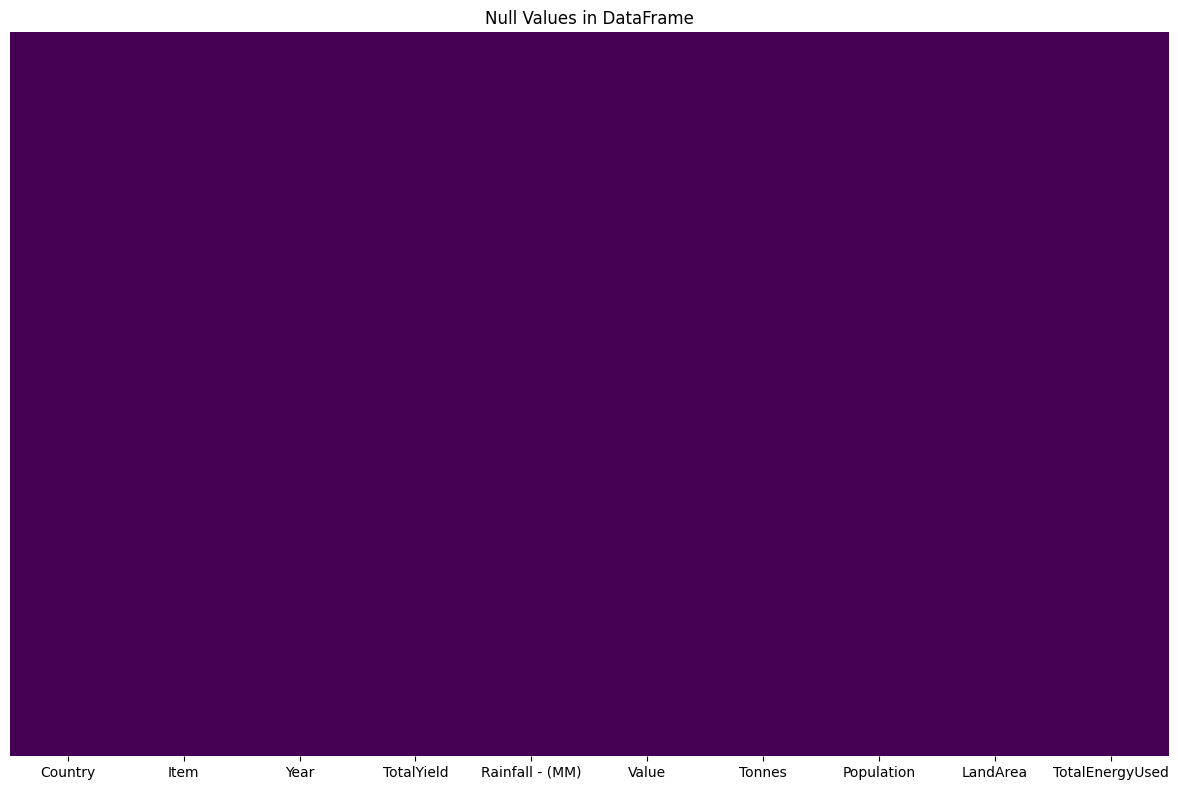

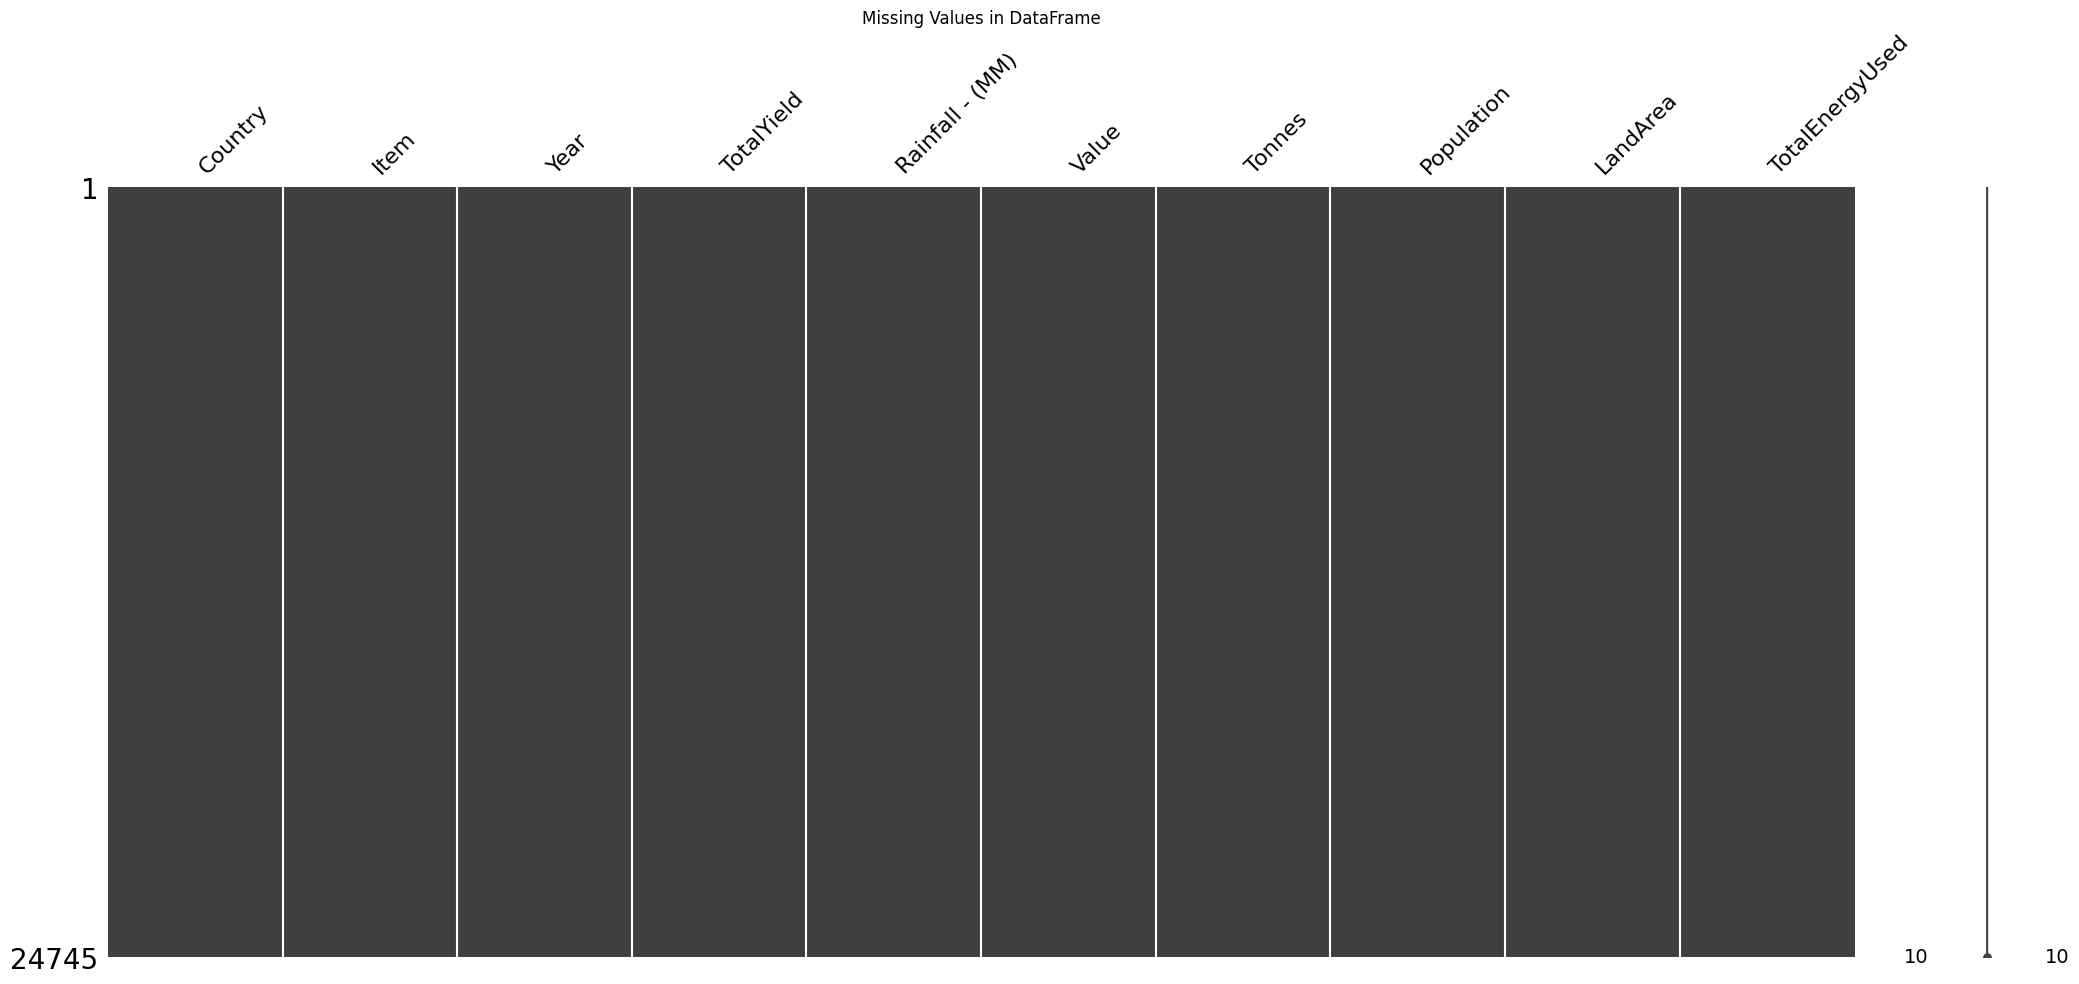

Null value counts:
Country            0
Item               0
Year               0
TotalYield         0
Rainfall - (MM)    0
Value              0
Tonnes             0
Population         0
LandArea           0
TotalEnergyUsed    0
dtype: int64


In [336]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of null values
plt.figure(figsize=(12, 8))
sns.heatmap(final_data.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Null Values in DataFrame')
plt.tight_layout()
plt.show()

# Alternatively, you can use missingno library for a more detailed visualization
import missingno as msno

msno.matrix(final_data)
plt.title('Missing Values in DataFrame')
plt.show()

# To get a summary of null values
null_counts = final_data.isnull().sum()
print("Null value counts:")
print(null_counts)

In [337]:
# Find unique countries
unique_countries = final_data['Country'].unique()

# Find unique items
unique_items = final_data['Item'].unique()

# Print the results
print("Unique Countries:")
print(unique_countries)
print("\nNumber of unique countries:", len(unique_countries))

print("\nUnique Items:")
print(unique_items)
print("\nNumber of unique items:", len(unique_items))

Unique Countries:
['Albania' 'Algeria' 'Angola' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Barbados'
 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Denmark' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Faroe Islands' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iraq' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kuwait' 'Kyrgyzstan'
 'Latvia' 'Lebanon' 'Lesotho' 'Liberia' 'Libya' 'Lithuania' 'Luxembourg'
 'Madagascar' 'Malawi' 'Malaysia' 'Maldives' 'Mali' 'Malt

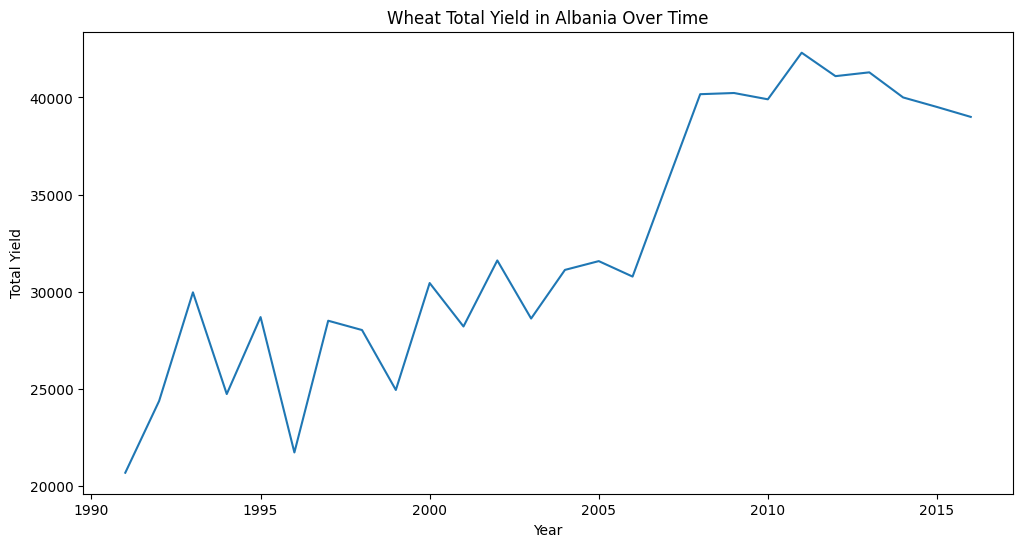

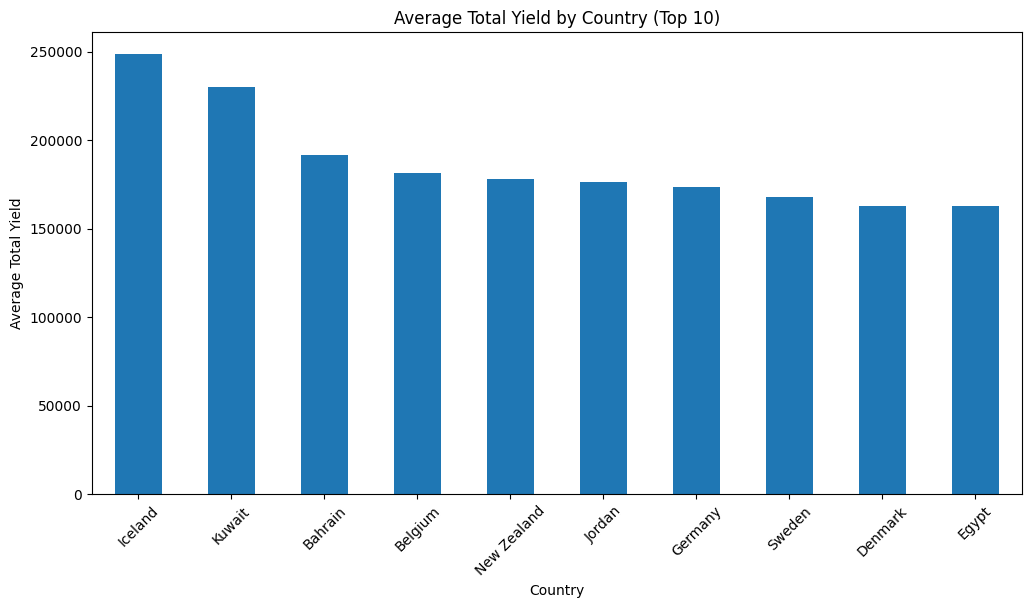

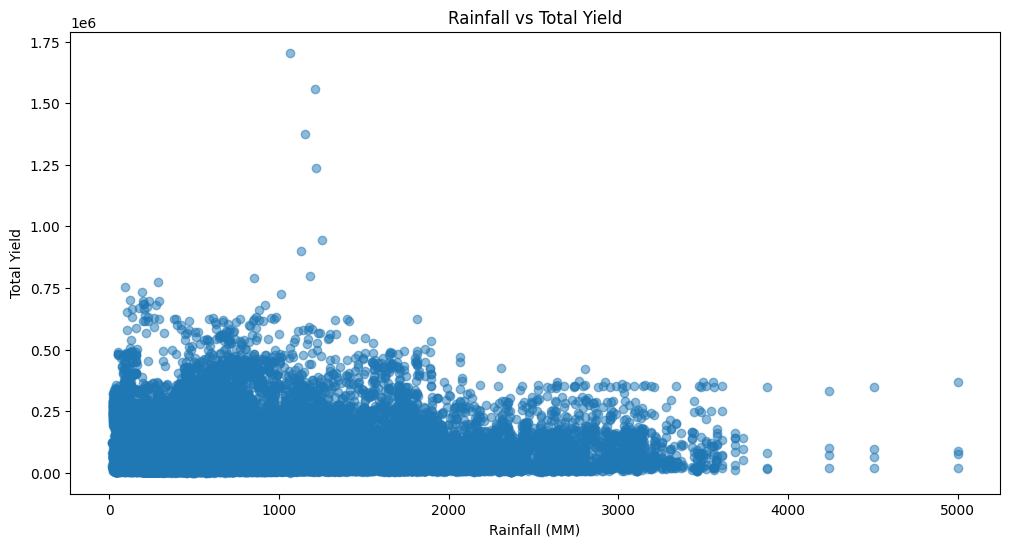

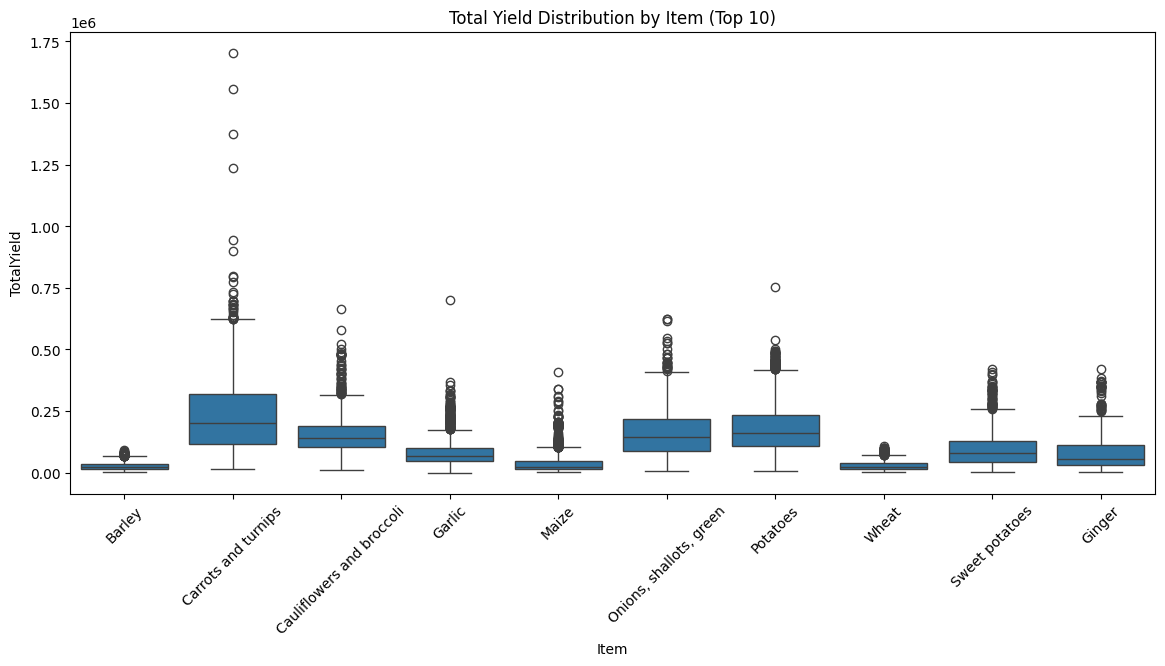

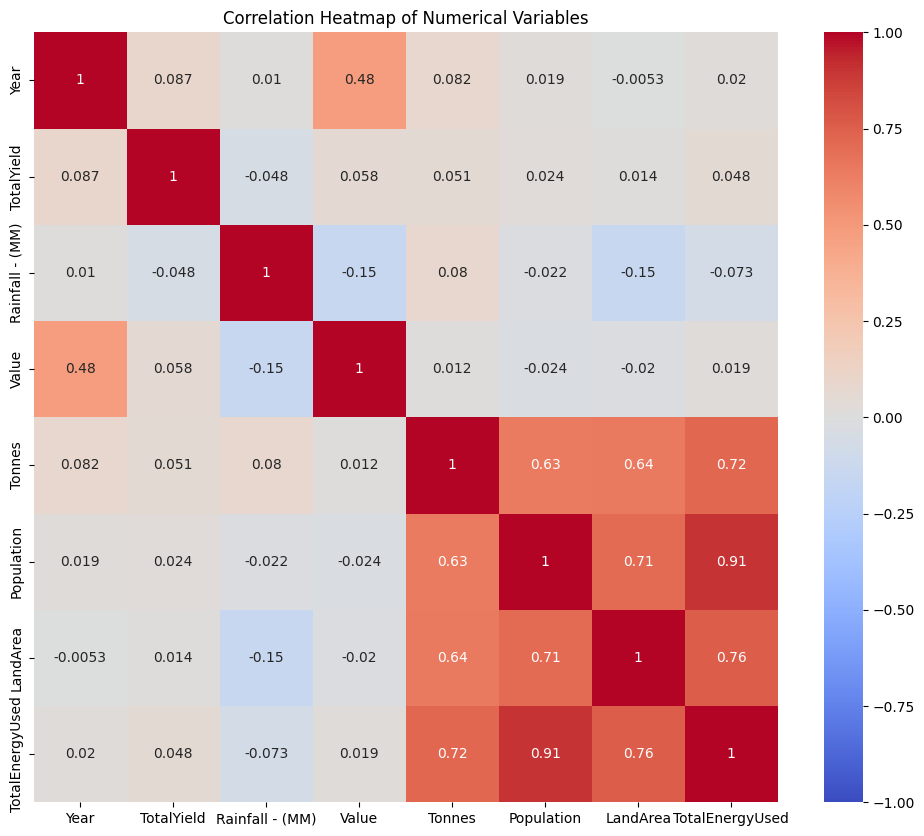

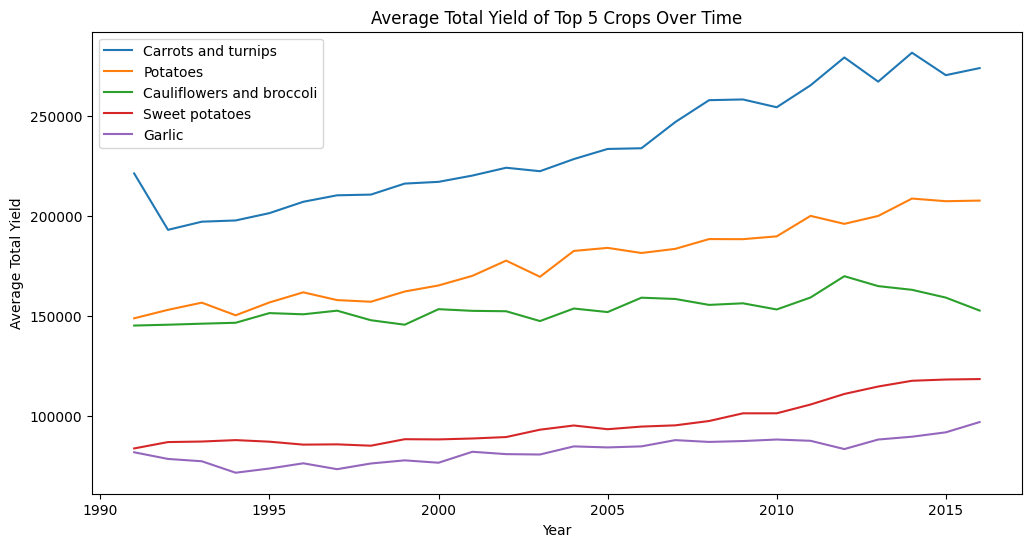

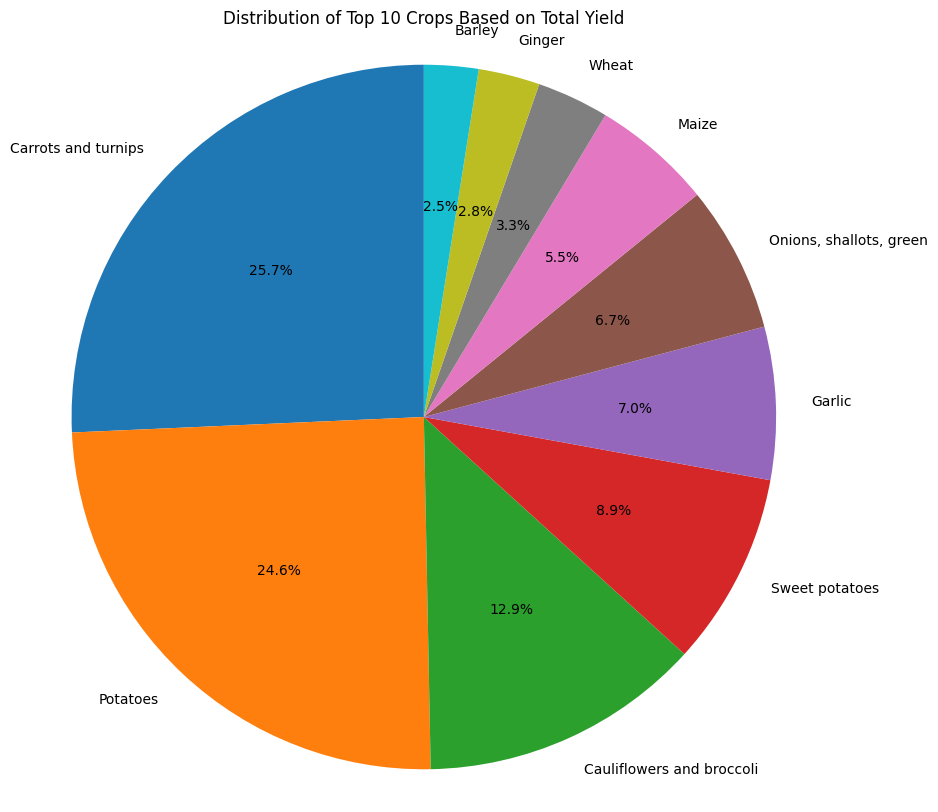

In [338]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# 1. Line plot: Total Yield over time for a specific country and crop
plt.figure(figsize=(12, 6))
country_crop = final_data[(final_data['Country'] == 'Albania') & (final_data['Item'] == 'Wheat')]
plt.plot(country_crop['Year'], country_crop['TotalYield'])
plt.title('Wheat Total Yield in Albania Over Time')
plt.xlabel('Year')
plt.ylabel('Total Yield')
plt.show()

# 2. Bar plot: Average Total Yield by Country (top 10)
avg_yield_by_country = final_data.groupby('Country')['TotalYield'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
avg_yield_by_country.plot(kind='bar')
plt.title('Average Total Yield by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Average Total Yield')
plt.xticks(rotation=45)
plt.show()

# 3. Scatter plot: Rainfall vs Total Yield
plt.figure(figsize=(12, 6))
plt.scatter(final_data['Rainfall - (MM)'], final_data['TotalYield'], alpha=0.5)
plt.title('Rainfall vs Total Yield')
plt.xlabel('Rainfall (MM)')
plt.ylabel('Total Yield')
plt.show()

# 4. Box plot: Total Yield distribution by Item (top 10 items)
top_10_items = final_data.groupby('Item')['TotalYield'].median().sort_values(ascending=False).head(10).index
plt.figure(figsize=(14, 6))
sns.boxplot(x='Item', y='TotalYield', data=final_data[final_data['Item'].isin(top_10_items)])
plt.title('Total Yield Distribution by Item (Top 10)')
plt.xticks(rotation=45)
plt.show()

# 5. Heatmap: Correlation matrix of numerical columns
numeric_columns = ['Year', 'TotalYield', 'Rainfall - (MM)', 'Value', 'Tonnes', 'Population', 'LandArea', 'TotalEnergyUsed']
correlation_matrix = final_data[numeric_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

# 6. Line plot: Average Total Yield of top 5 crops over time
top_5_crops = final_data.groupby('Item')['TotalYield'].sum().sort_values(ascending=False).head(5).index
crop_data = final_data[final_data['Item'].isin(top_5_crops)].groupby(['Year', 'Item'])['TotalYield'].mean().unstack()
plt.figure(figsize=(12, 6))
for crop in top_5_crops:
    plt.plot(crop_data.index, crop_data[crop], label=crop)
plt.title('Average Total Yield of Top 5 Crops Over Time')
plt.xlabel('Year')
plt.ylabel('Average Total Yield')
plt.legend()
plt.show()

# 7. Pie chart: Distribution of crops (Items) based on total yield
item_totals = final_data.groupby('Item')['TotalYield'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 10))
plt.pie(item_totals, labels=item_totals.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Top 10 Crops Based on Total Yield')
plt.axis('equal')
plt.show()

In [339]:
import pandas as pd

# Load the data

# Group by Country and Item (crop), and calculate the average TotalYield
grouped = final_data.groupby(['Country', 'Item'])['TotalYield'].mean().reset_index()

# Sort the results by TotalYield in descending order
sorted_yields = grouped.sort_values('TotalYield', ascending=False)

# Get the top 3 countries
top_countries = sorted_yields['Country'].unique()[:3]

# For each top country, get their top 3 crops
for country in top_countries:
    print(f"\nTop 3 crops for {country}:")
    top_crops = sorted_yields[sorted_yields['Country'] == country].head(3)
    for _, row in top_crops.iterrows():
        print(f"{row['Item']}: {row['TotalYield']:.2f}")



Top 3 crops for Israel:
Carrots and turnips: 643057.92
Potatoes: 337451.81
Cauliflowers and broccoli: 183446.19

Top 3 crops for Belgium:
Carrots and turnips: 595047.71
Potatoes: 450104.00
Cauliflowers and broccoli: 195894.82

Top 3 crops for Iceland:
Carrots and turnips: 543992.12
Potatoes: 139958.04
Cauliflowers and broccoli: 78500.35


In [340]:
final_data
final_data.to_csv('final_data.csv', index=False)

In [341]:
unique_rows

,Country,Item,Year,TotalYield,Rainfall - (MM),Value,Tonnes,Population,LandArea,TotalEnergyUsed
0,Albania,Barley,1991,9231,917.86880,-0.471000,121.00,3302.081,1127.0,4310.1744
1,Albania,Barley,1992,13802,797.69610,0.321500,121.00,3303.739,1127.0,3385.2816
2,Albania,Barley,1993,13324,861.27477,0.305500,121.00,3300.711,1126.0,2315.1308
3,Albania,Barley,1994,23523,1006.21230,1.232417,201.00,3293.999,1126.0,1467.8822
4,Albania,Barley,1995,22527,1076.81184,-0.003250,251.00,3284.364,1127.0,3844.7500
...,...,...,...,...,...,...,...,...,...,...
24950,Zimbabwe,Wheat,2012,24902,543.74841,0.456167,3375.53,13265.331,16200.0,14203.4000
24951,Zimbabwe,Wheat,2013,23429,614.81309,0.186500,2550.07,13555.422,16200.0,10158.6000
24952,Zimbabwe,Wheat,2014,22150,607.29762,0.229500,2185.07,13855.753,16200.0,9147.3000
24953,Zimbabwe,Wheat,2015,20486,390.63457,1.114167,2185.07,14154.937,16200.0,9744.6000


<ipython-input-342-28bc699e0c5f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = pd.to_datetime(df['Year'], format='%Y')


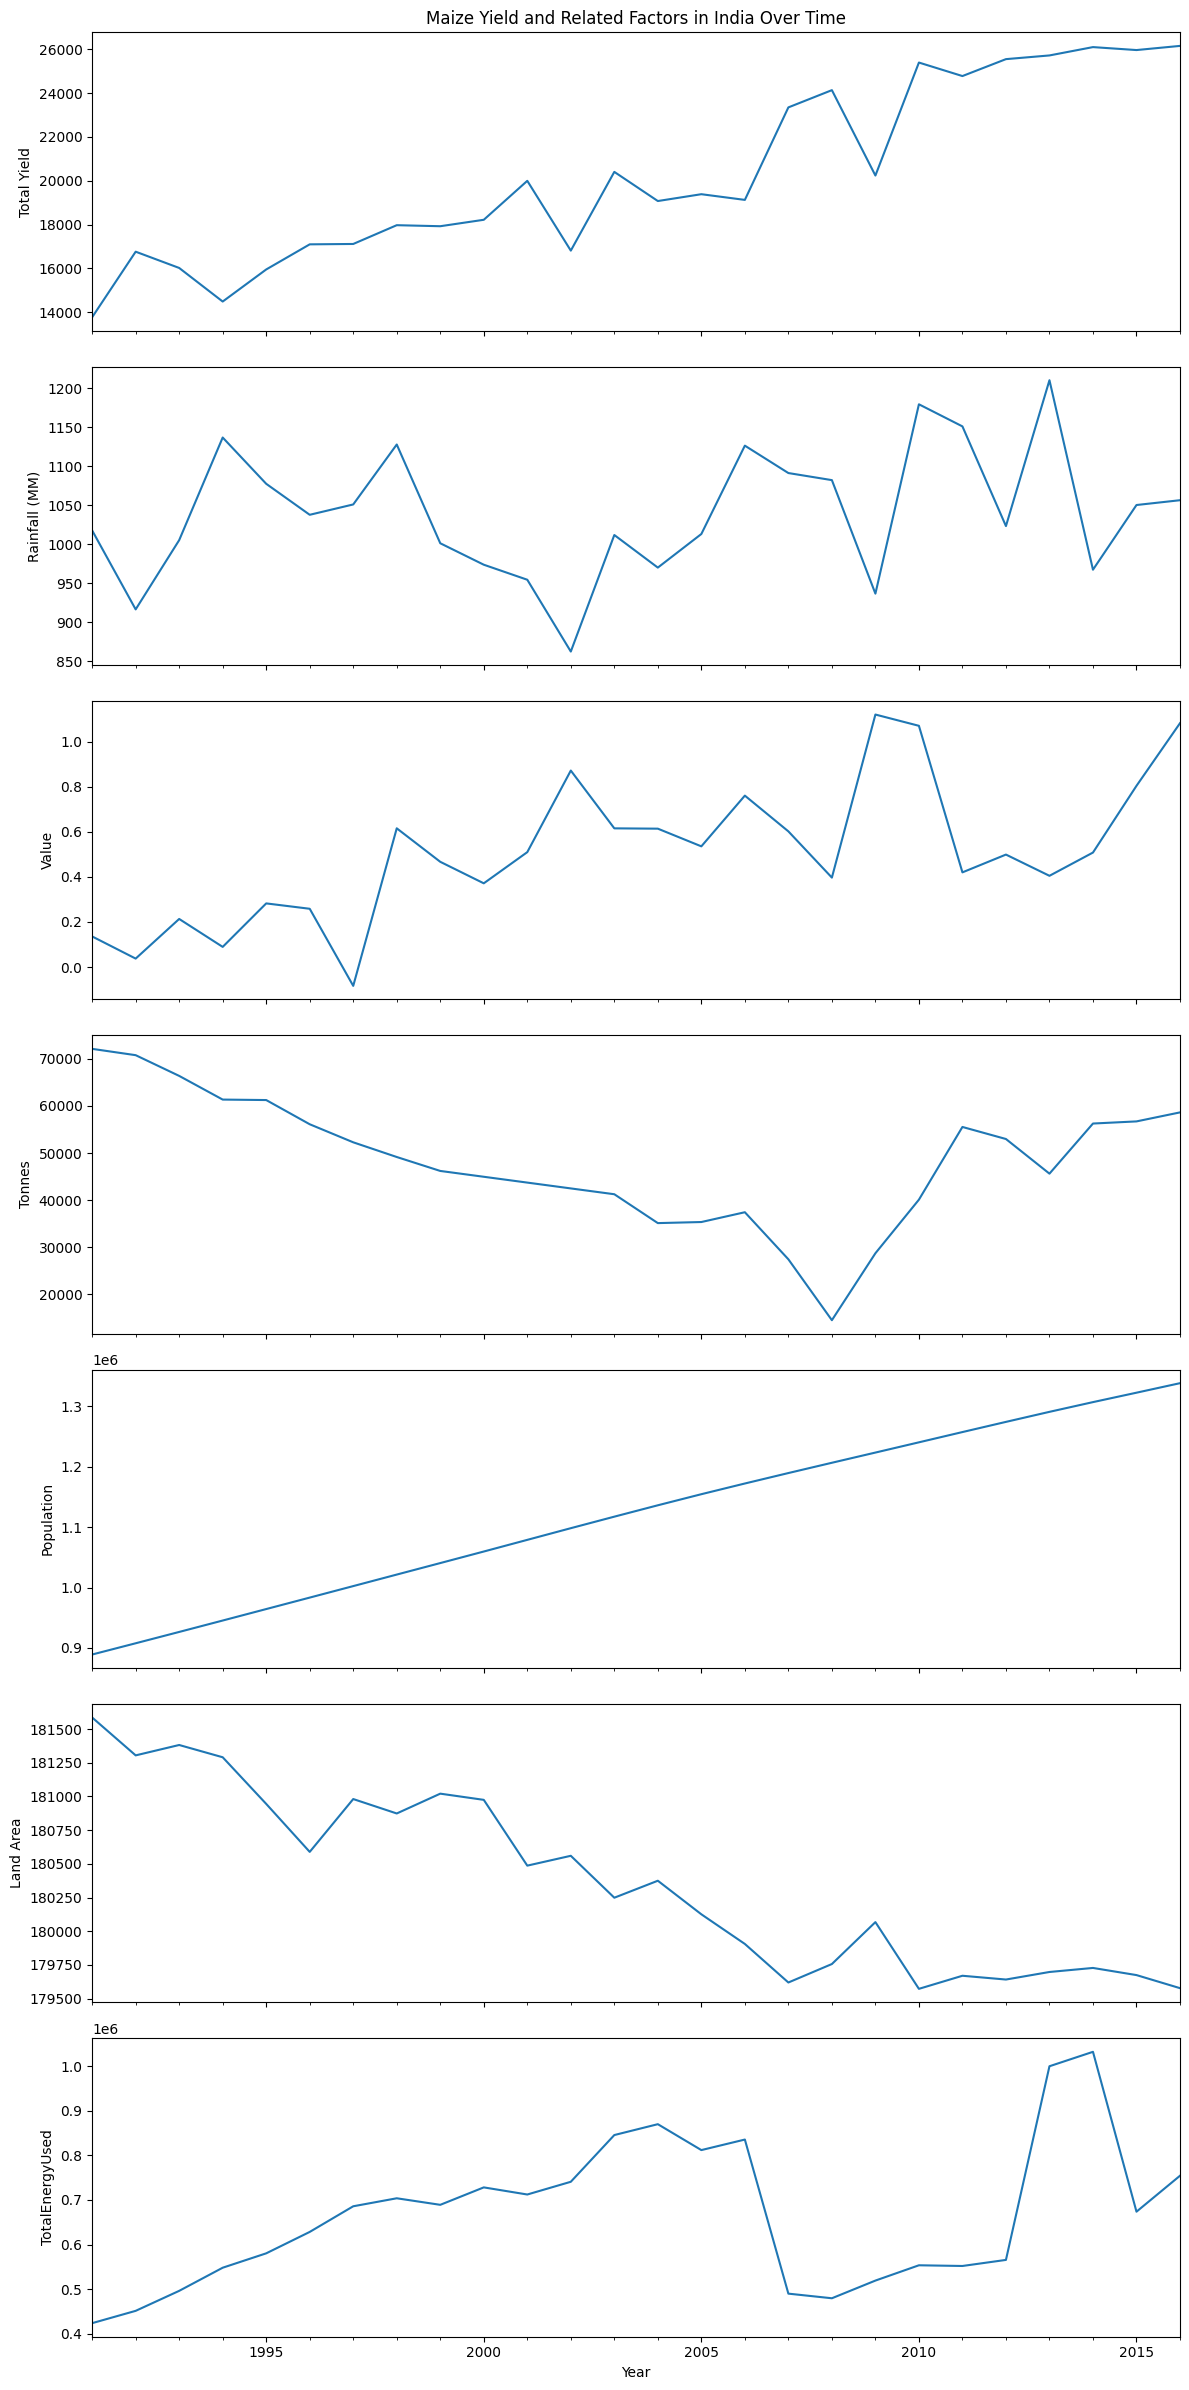

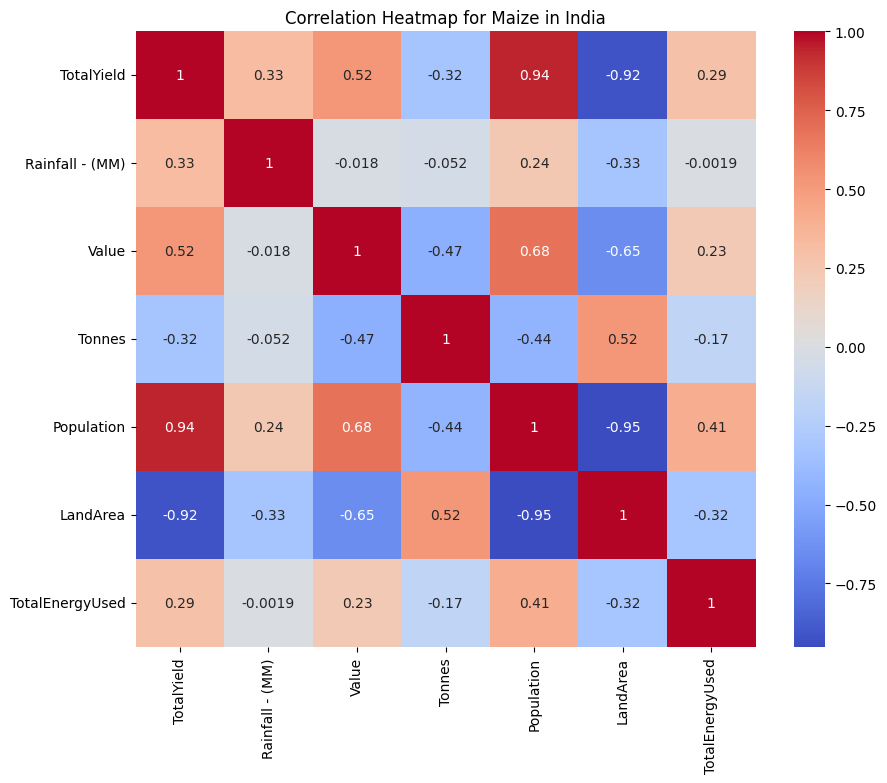

Results of Dickey-Fuller Test:
Test Statistic                  0.124636
p-value                         0.967703
#Lags Used                      2.000000
Number of Observations Used    23.000000
Critical Value (1%)            -3.752928
Critical Value (5%)            -2.998500
Critical Value (10%)           -2.638967
dtype: float64
Testing Granger Causality: TotalYield -> Rainfall - (MM)


Testing Granger Causality: TotalYield -> Value


Testing Granger Causality: TotalYield -> Tonnes


Testing Granger Causality: TotalYield -> Population


Testing Granger Causality: TotalYield -> LandArea


Testing Granger Causality: TotalYield -> TotalEnergyUsed


Testing Granger Causality: Rainfall - (MM) -> TotalYield


Testing Granger Causality: Rainfall - (MM) -> Value


Testing Granger Causality: Rainfall - (MM) -> Tonnes


Testing Granger Causality: Rainfall - (MM) -> Population


Testing Granger Causality: Rainfall - (MM) -> LandArea


Testing Granger Causality: Rainfall - (MM) -> TotalEnergyUse

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print resul



Testing Granger Causality: Value -> Rainfall - (MM)


Testing Granger Causality: Value -> Tonnes


Testing Granger Causality: Value -> Population


Testing Granger Causality: Value -> LandArea


Testing Granger Causality: Value -> TotalEnergyUsed


Testing Granger Causality: Tonnes -> TotalYield


Testing Granger Causality: Tonnes -> Rainfall - (MM)


Testing Granger Causality: Tonnes -> Value


Testing Granger Causality: Tonnes -> Population


Testing Granger Causality: Tonnes -> LandArea


Testing Granger Causality: Tonnes -> TotalEnergyUsed


Testing Granger Causality: Population -> TotalYield


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print resul



Testing Granger Causality: Population -> Rainfall - (MM)


Testing Granger Causality: Population -> Value


Testing Granger Causality: Population -> Tonnes


Testing Granger Causality: Population -> LandArea


Testing Granger Causality: Population -> TotalEnergyUsed


Testing Granger Causality: LandArea -> TotalYield


Testing Granger Causality: LandArea -> Rainfall - (MM)


Testing Granger Causality: LandArea -> Value


Testing Granger Causality: LandArea -> Tonnes


Testing Granger Causality: LandArea -> Population


Testing Granger Causality: LandArea -> TotalEnergyUsed


Testing Granger Causality: TotalEnergyUsed -> TotalYield


Testing Granger Causality: TotalEnergyUsed -> Rainfall - (MM)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print resul



Testing Granger Causality: TotalEnergyUsed -> Value


Testing Granger Causality: TotalEnergyUsed -> Tonnes


Testing Granger Causality: TotalEnergyUsed -> Population


Testing Granger Causality: TotalEnergyUsed -> LandArea


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 01, Aug, 2024
Time:                     14:54:35
--------------------------------------------------------------------
No. of Equations:         7.00000    BIC:                    87.0934
Nobs:                     25.0000    HQIC:                   85.1204
Log likelihood:          -1246.85    FPE:                5.11989e+36
AIC:                      84.3631    Det(Omega_mle):     7.33234e+35
--------------------------------------------------------------------
Results for equation TotalYield
                        coefficient       std. error           t-stat            prob
------------------------------------------------------------------

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


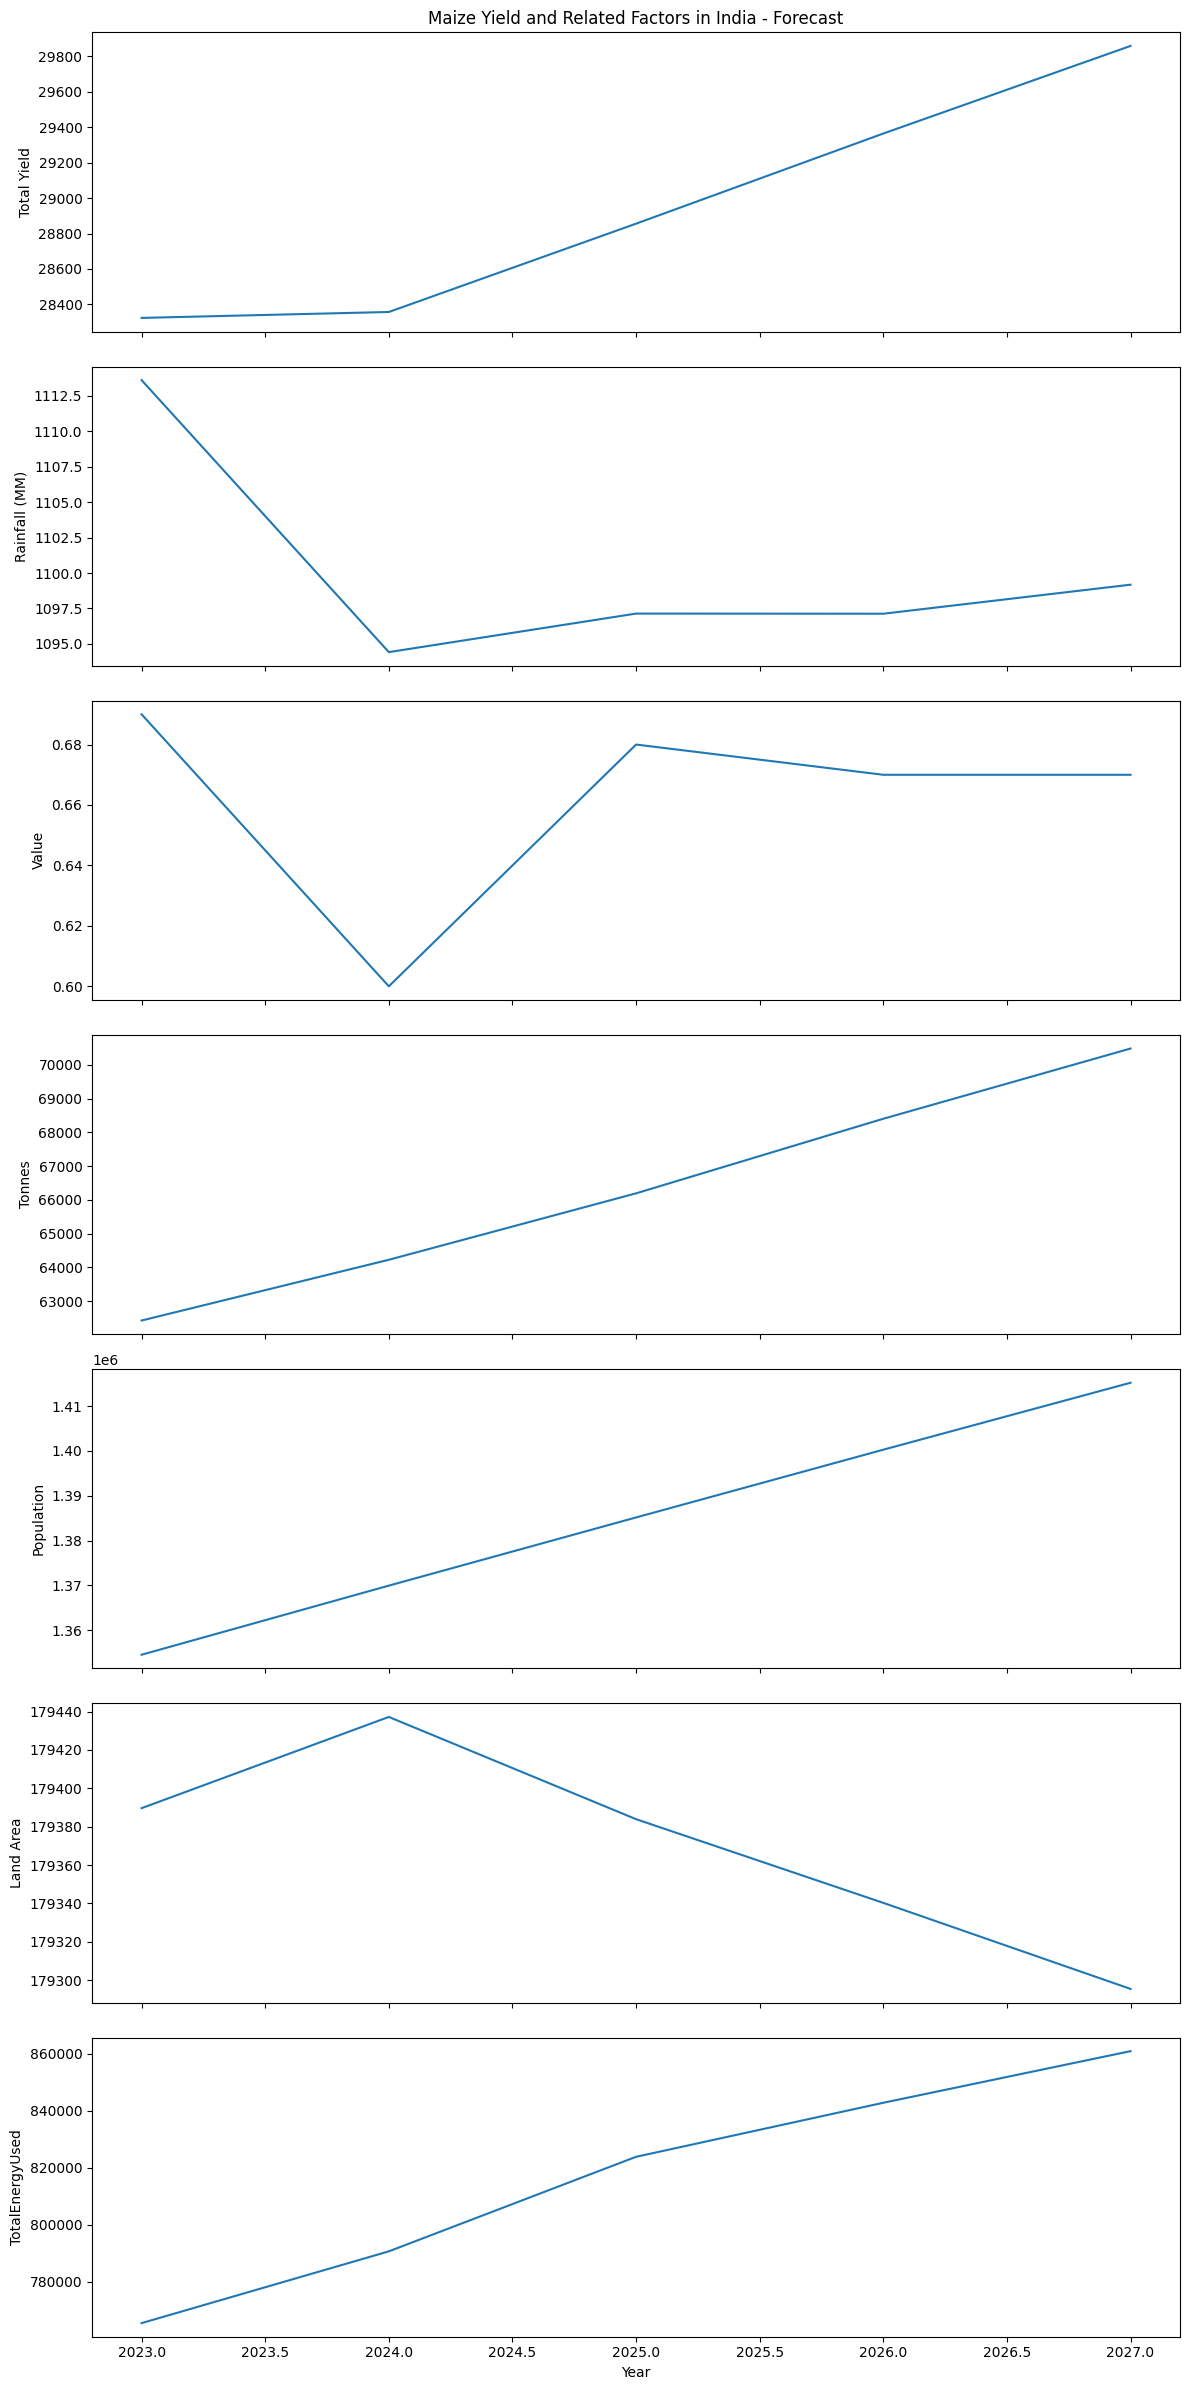


Percentage change from first to last forecast year:
TotalYield         1.68
Rainfall - (MM)    0.19
Value              0.00
Tonnes             3.04
Population         1.07
LandArea          -0.02
TotalEnergyUsed    2.15
Name: 2027, dtype: float64


In [342]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR

# Load the dataset
df = final_data
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df.set_index('Year', inplace=True)
grouped_data = df.groupby(['Year', 'Country', 'Item']).agg({
    'TotalYield': 'sum',
    'Rainfall - (MM)': 'mean',
    'Value': 'mean',
    'Tonnes': 'sum',
    'Population': 'mean',
    'LandArea': 'mean',
    'TotalEnergyUsed': 'mean'
}).reset_index()

# Set Year as index again
grouped_data.set_index('Year', inplace=True)

def analyze_and_forecast(country, crop, data):
    # Filter data for the chosen country and crop
    crop_data = data[(data['Country'] == country) & (data['Item'] == crop)]

    # Check if there is enough data
    if len(crop_data) < 10:
        print(f"Not enough data to analyze {crop} in {country}.")
        return

    # Visualize time series for multiple variables
    fig, axs = plt.subplots(7, 1, figsize=(12, 24), sharex=True)
    crop_data['TotalYield'].plot(ax=axs[0])
    axs[0].set_title(f'{crop} Yield and Related Factors in {country} Over Time')
    axs[0].set_ylabel('Total Yield')

    crop_data['Rainfall - (MM)'].plot(ax=axs[1])
    axs[1].set_ylabel('Rainfall (MM)')

    crop_data['Value'].plot(ax=axs[2])
    axs[2].set_ylabel('Value')

    crop_data['Tonnes'].plot(ax=axs[3])
    axs[3].set_ylabel('Tonnes')

    crop_data['Population'].plot(ax=axs[4])
    axs[4].set_ylabel('Population')

    crop_data['LandArea'].plot(ax=axs[5])
    axs[5].set_ylabel('Land Area')

    crop_data['TotalEnergyUsed'].plot(ax=axs[6])
    axs[6].set_ylabel('TotalEnergyUsed')

    plt.tight_layout()
    plt.show()

    # Correlation analysis
    correlation_matrix = crop_data[['TotalYield', 'Rainfall - (MM)', 'Value', 'Tonnes', 'Population', 'LandArea', 'TotalEnergyUsed']].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title(f'Correlation Heatmap for {crop} in {country}')
    plt.show()

    # Stationarity test for TotalYield
    def test_stationarity(timeseries):
        print('Results of Dickey-Fuller Test:')
        dftest = adfuller(timeseries, autolag='AIC')
        dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
        for key,value in dftest[4].items():
            dfoutput['Critical Value (%s)'%key] = value
        print(dfoutput)

    test_stationarity(crop_data['TotalYield'])

    # Granger Causality Test
    from statsmodels.tsa.stattools import grangercausalitytests

    def granger_causality(data, variables, max_lag=5):
        for v1 in variables:
            for v2 in variables:
                if v1 != v2:
                    print(f"Testing Granger Causality: {v1} -> {v2}")
                    grangercausalitytests(data[[v2, v1]], maxlag=max_lag, verbose=False)
                    print("\n")

    variables = ['TotalYield', 'Rainfall - (MM)', 'Value', 'Tonnes', 'Population', 'LandArea', 'TotalEnergyUsed']
    granger_causality(crop_data, variables)

    # Vector Autoregression (VAR) Model
    model_data = crop_data[variables]
    model = VAR(model_data)
    results = model.fit()

    print(results.summary())

    # Forecast
    lag_order = results.k_ar
    forecast = results.forecast(model_data.values[-lag_order:], steps=5)

    # Create a DataFrame from the forecast data
    forecast_df = pd.DataFrame(forecast, columns=variables)

    # Add a year column (assuming the last year in your data was 2022)
    forecast_df['Year'] = range(2023, 2028)

    # Set Year as the index
    forecast_df.set_index('Year', inplace=True)

    # Round the values for better readability
    forecast_df = forecast_df.round(2)

    print("Forecast for the next 5 years:")
    print(forecast_df)

    # Plot the forecast
    fig, axs = plt.subplots(7, 1, figsize=(12, 24), sharex=True)
    forecast_df['TotalYield'].plot(ax=axs[0])
    axs[0].set_title(f'{crop} Yield and Related Factors in {country} - Forecast')
    axs[0].set_ylabel('Total Yield')

    forecast_df['Rainfall - (MM)'].plot(ax=axs[1])
    axs[1].set_ylabel('Rainfall (MM)')

    forecast_df['Value'].plot(ax=axs[2])
    axs[2].set_ylabel('Value')

    forecast_df['Tonnes'].plot(ax=axs[3])
    axs[3].set_ylabel('Tonnes')

    forecast_df['Population'].plot(ax=axs[4])
    axs[4].set_ylabel('Population')

    forecast_df['LandArea'].plot(ax=axs[5])
    axs[5].set_ylabel('Land Area')

    forecast_df['TotalEnergyUsed'].plot(ax=axs[6])
    axs[6].set_ylabel('TotalEnergyUsed')

    plt.tight_layout()
    plt.show()

    # Calculate percentage changes
    percent_change = forecast_df.pct_change().iloc[-1] * 100

    print("\nPercentage change from first to last forecast year:")
    print(percent_change.round(2))

# Example usage
analyze_and_forecast('India', 'Maize', grouped_data)

In [344]:
final_data = pd.read_csv('/content/final_data.csv')


In [346]:
final_data.columns

Index(['Country', 'Item', 'Year', 'TotalYield', 'Rainfall - (MM)', 'Value',
       'Tonnes', 'Population', 'LandArea', 'TotalEnergyUsed'],
      dtype='object')

In [349]:
import pandas as pd

# Assign column names based on the structure of your data
final_data.columns = ['Country', 'Item', 'Year', 'TotalYield', 'Rainfall - (MM)', 'Value', 'Tonnes', 'Population', 'LandArea', 'EnergyUsed']

# Aggregate the data and calculate total energy used
aggregated_data = final_data.groupby(['Country', 'Item', 'Year']).agg({
    'TotalYield': 'first',
    'Rainfall - (MM)': 'first',
    'Value': 'first',
    'Tonnes': 'first',
    'Population': 'first',
    'LandArea': 'first',
    'EnergyUsed': 'sum'
}).reset_index()

# Rename the EnergyUse column to TotalEnergyUsed
aggregated_data.rename(columns={'EnergyUse': 'TotalEnergyUsed'}, inplace=True)

# Reorder columns to match the specified structure
column_order = ['Country', 'Item', 'Year', 'TotalYield', 'Rainfall - (MM)', 'Value', 'Tonnes', 'Population', 'LandArea', 'EnergyUsed']
final_data = aggregated_data[column_order]

# Save the processed data to a new CSV file
output_file = 'processed_data.csv'
final_data.to_csv(output_file, index=False)

print(f"Data has been processed and saved to {output_file}")
print("\nFirst few rows of processed data:")
print(final_data.head())

Data has been processed and saved to processed_data.csv

First few rows of processed data:
   Country    Item  Year  TotalYield  Rainfall - (MM)     Value  Tonnes  \
0  Albania  Barley  1991        9231        917.86880 -0.471000   121.0   
1  Albania  Barley  1992       13802        797.69610  0.321500   121.0   
2  Albania  Barley  1993       13324        861.27477  0.305500   121.0   
3  Albania  Barley  1994       23523       1006.21230  1.232417   201.0   
4  Albania  Barley  1995       22527       1076.81184 -0.003250   251.0   

   Population  LandArea  EnergyUsed  
0    3302.081    1127.0   4310.1744  
1    3303.739    1127.0   3385.2816  
2    3300.711    1126.0   2315.1308  
3    3293.999    1126.0   1467.8822  
4    3284.364    1127.0   3844.7500  


In [350]:
# Check for null values
null_counts = final_data.isnull().sum()

# Display the count of null values for each column
print("Null value counts for each column:")
print(null_counts)


Null value counts for each column:
Country            0
Item               0
Year               0
TotalYield         0
Rainfall - (MM)    0
Value              0
Tonnes             0
Population         0
LandArea           0
EnergyUsed         0
dtype: int64


In [351]:
# Remove rows where 'Value' is null
final_data = final_data.dropna(subset=['Value'])

In [352]:
# Check for null values
null_counts = final_data.isnull().sum()

# Display the count of null values for each column
print("Null value counts for each column:")
print(null_counts)

Null value counts for each column:
Country            0
Item               0
Year               0
TotalYield         0
Rainfall - (MM)    0
Value              0
Tonnes             0
Population         0
LandArea           0
EnergyUsed         0
dtype: int64


In [353]:
# One Hot Encoding
from sklearn.preprocessing import OneHotEncoder

df_onehot = pd.get_dummies(final_data, columns=['Country', 'Item'], prefix=['Country', 'Item'])
final_data = df_onehot.loc[:, df_onehot.columns != 'TotalYield']
final_data['TotalYield'] = df_onehot['TotalYield']

In [354]:
final_data.shape

(24745, 169)

In [355]:
from scipy import stats
import numpy as np

# Assuming final_data is a DataFrame
y = final_data['TotalYield']
X = final_data.drop('TotalYield', axis=1)

# Select only numeric columns
X_numeric = X.select_dtypes(include=[np.number])

# Compute z-scores
z_scores = stats.zscore(X_numeric)

# Get absolute z-scores
abs_z_scores = np.abs(z_scores)

# Filter entries
filtered_entries = (abs_z_scores < 11).all(axis=1)

# Apply the filter to your data
filtered_data = final_data[filtered_entries]


In [356]:
#Feature Scaling
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


X_numeric = X.select_dtypes(include=[np.number])
X_numeric = X_numeric.fillna(X_numeric.mean())

scaler = MinMaxScaler()

scaled_features = scaler.fit_transform(X_numeric)

data_without_yield = pd.DataFrame(scaled_features, index=X_numeric.index, columns=X_numeric.columns)

data_without_yield.insert(len(data_without_yield.columns), 'TotalYield', y)

data = data_without_yield

print(data.head())


   Year  Rainfall - (MM)     Value    Tonnes  Population  LandArea  \
0  0.00         0.180849  0.188094  0.000233    0.002273  0.002118   
1  0.04         0.156732  0.368269  0.000233    0.002274  0.002118   
2  0.08         0.169491  0.364632  0.000233    0.002272  0.002116   
3  0.12         0.198578  0.575367  0.000389    0.002267  0.002116   
4  0.16         0.212746  0.294437  0.000486    0.002261  0.002118   

   EnergyUsed  TotalYield  
0    0.001639        9231  
1    0.001287       13802  
2    0.000880       13324  
3    0.000558       23523  
4    0.001462       22527  


In [357]:
y = data['TotalYield']
X = data.drop('TotalYield', axis=1)

In [358]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [359]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [360]:
def plot_regression_results(ax, y_test, y_pred, title, estimated_time, scores):

  slope, intercept, rvalue, pvalue, stderr = linregress(y_test, y_pred)
  ax.plot([y_test.min(), y_test.max()], [intercept+y_test.min()*slope, intercept+y_test.max()*slope], '--r')

  ax.scatter(y_test, y_pred, alpha=0.7)

  extra = plt.Rectangle((0, 0), 0, 0, fc="w", fill=False,
                          edgecolor='none', linewidth=0)
  ax.legend([extra], [scores], loc='upper left')

  ax.set_xlabel('Actual values in tonnes')
  ax.set_ylabel('Predictes values in tonnes')
  ax.set_title('{}\nTrained in {:.2f} Milliseconds'.format(name, estimated_time*1000))

In [361]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, max_error
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor

In [362]:
import time
from scipy.stats import linregress

lin = LinearRegression()
dtr = DecisionTreeRegressor()
sgd = SGDRegressor(loss='squared_loss')
gbr = GradientBoostingRegressor()
knn = KNeighborsRegressor(n_neighbors=5)
rfr = RandomForestRegressor()

In [363]:
estimators = [('Linear Regression', lin),
              ('Decision Tree Regression', dtr),
              ('Stochastic Gradient Descent Regression', sgd),
              ('Gradient Boosting Regression', gbr),
              ('K-nearest Neighbour 5', knn),
              ('Random Forest Regression', rfr)]

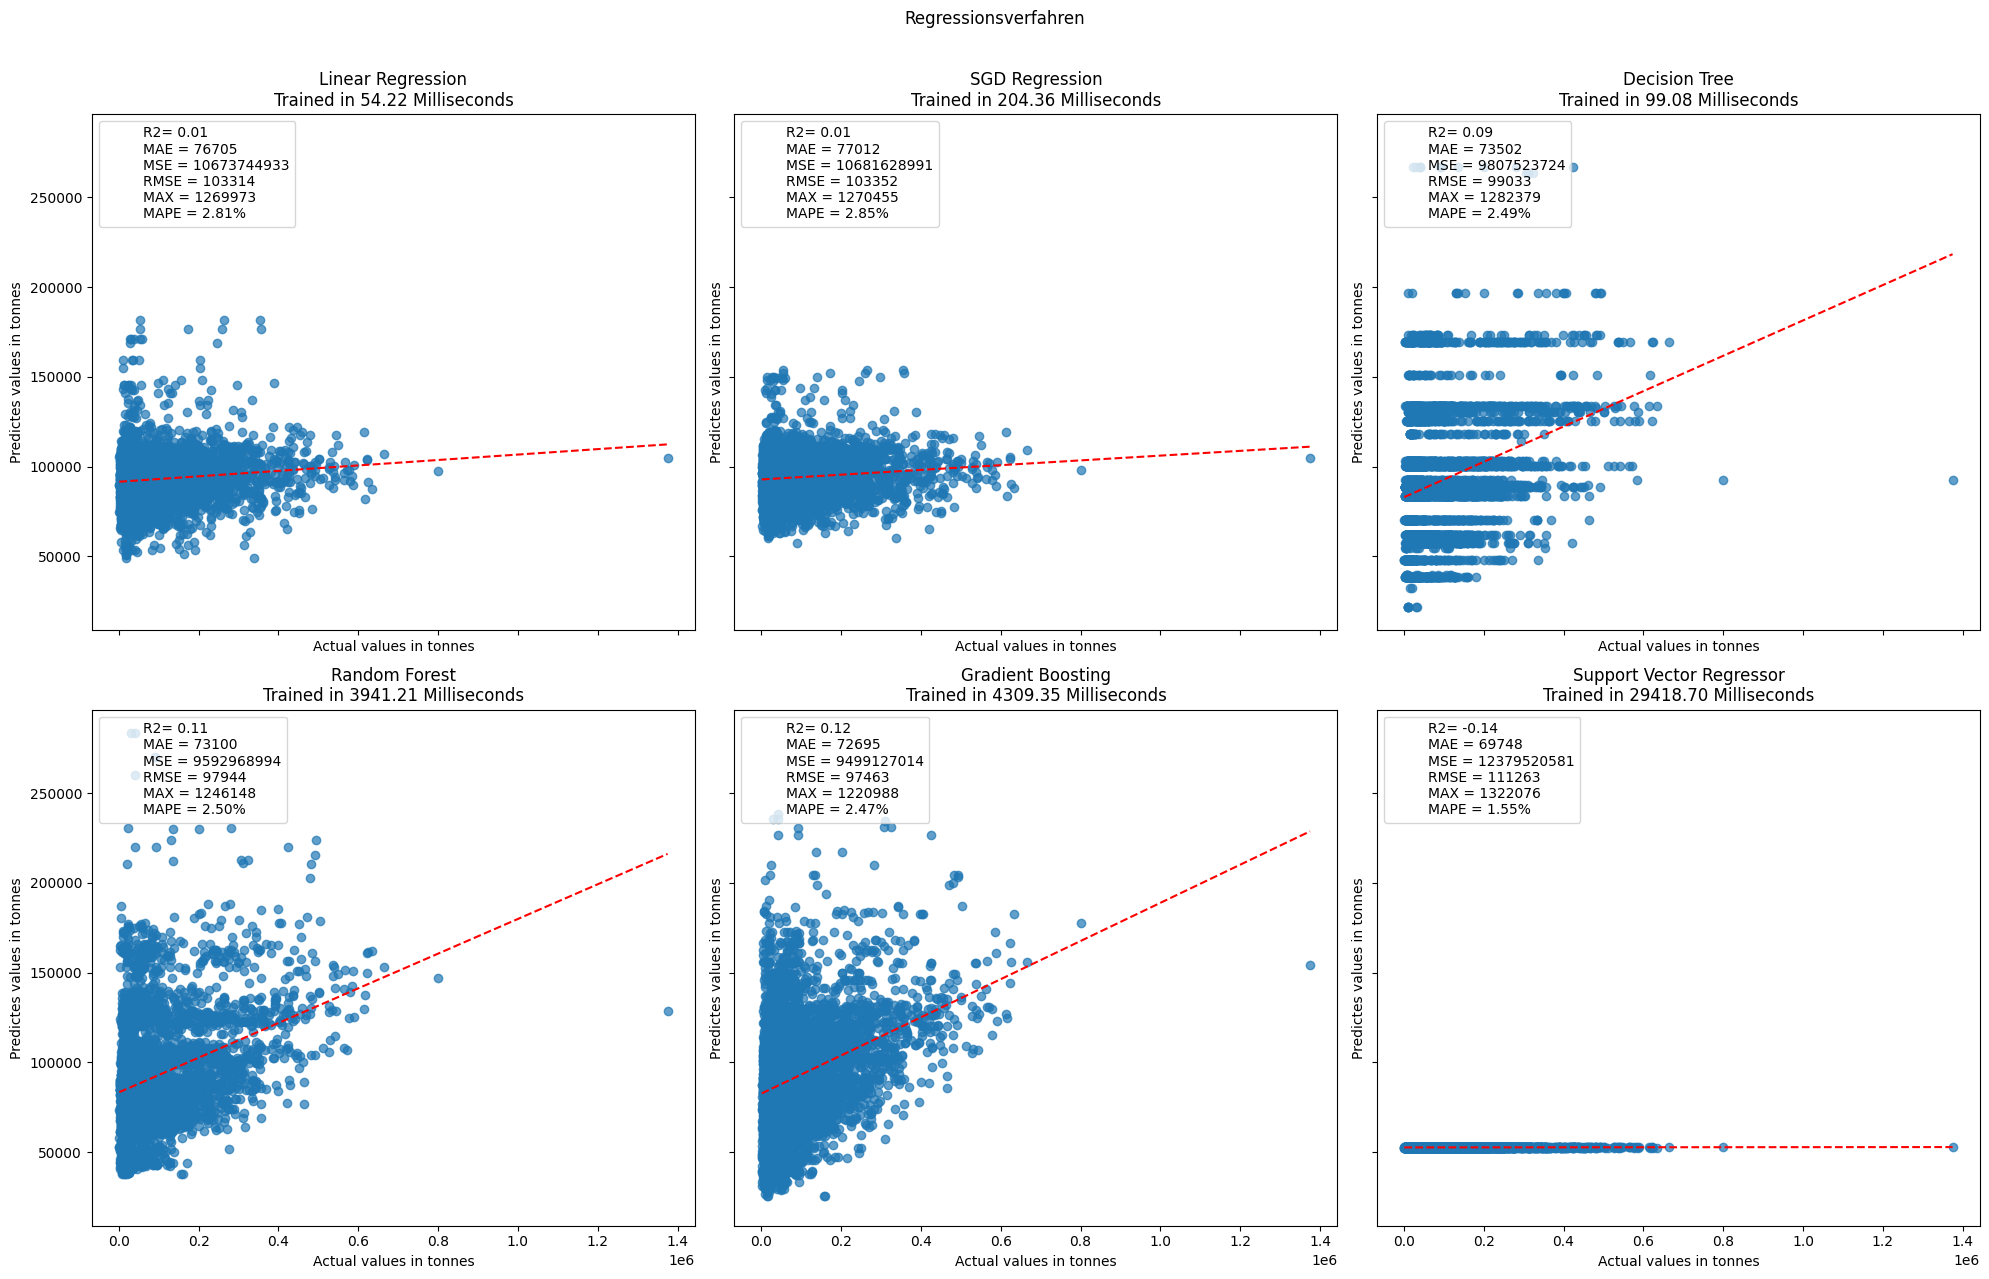

In [364]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, max_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
estimators = [
    ("Linear Regression", LinearRegression()),
    ("SGD Regression", SGDRegressor(loss='squared_error', max_iter=1000, tol=1e-3)),
    ("Decision Tree", DecisionTreeRegressor(max_depth=5)),
    ("Random Forest", RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)),
    ("Gradient Boosting", GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),
    ("Support Vector Regressor", SVR(kernel='rbf', C=1.0, epsilon=0.1))
]

fig, axs = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(20, 13))
axs = np.ravel(axs)

for ax, (name, est) in zip(axs, estimators):
    start_time = time.time()

    est.fit(X_train, y_train)
    y_pred = est.predict(X_test)
    estimated_time = time.time() - start_time
    plot_regression_results(ax, y_test, y_pred, name, estimated_time,
                            (r'R2= {:.2f}' + '\n' +
                            r'MAE = {:.0f}' + '\n' +
                            r'MSE = {:.0f}' + '\n' +
                            r'RMSE = {:.0f}' + '\n' +
                            r'MAX = {:.0f}' + '\n' +
                            r'MAPE = {:.2f}%')
                            .format(r2_score(y_test, y_pred),
                                    mean_absolute_error(y_test, y_pred),
                                    mean_squared_error(y_test, y_pred),
                                    mean_squared_error(y_test, y_pred, squared=False),
                                    max_error(y_test, y_pred),
                                    mean_absolute_percentage_error(y_test, y_pred)))

plt.suptitle('Regressionsverfahren')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

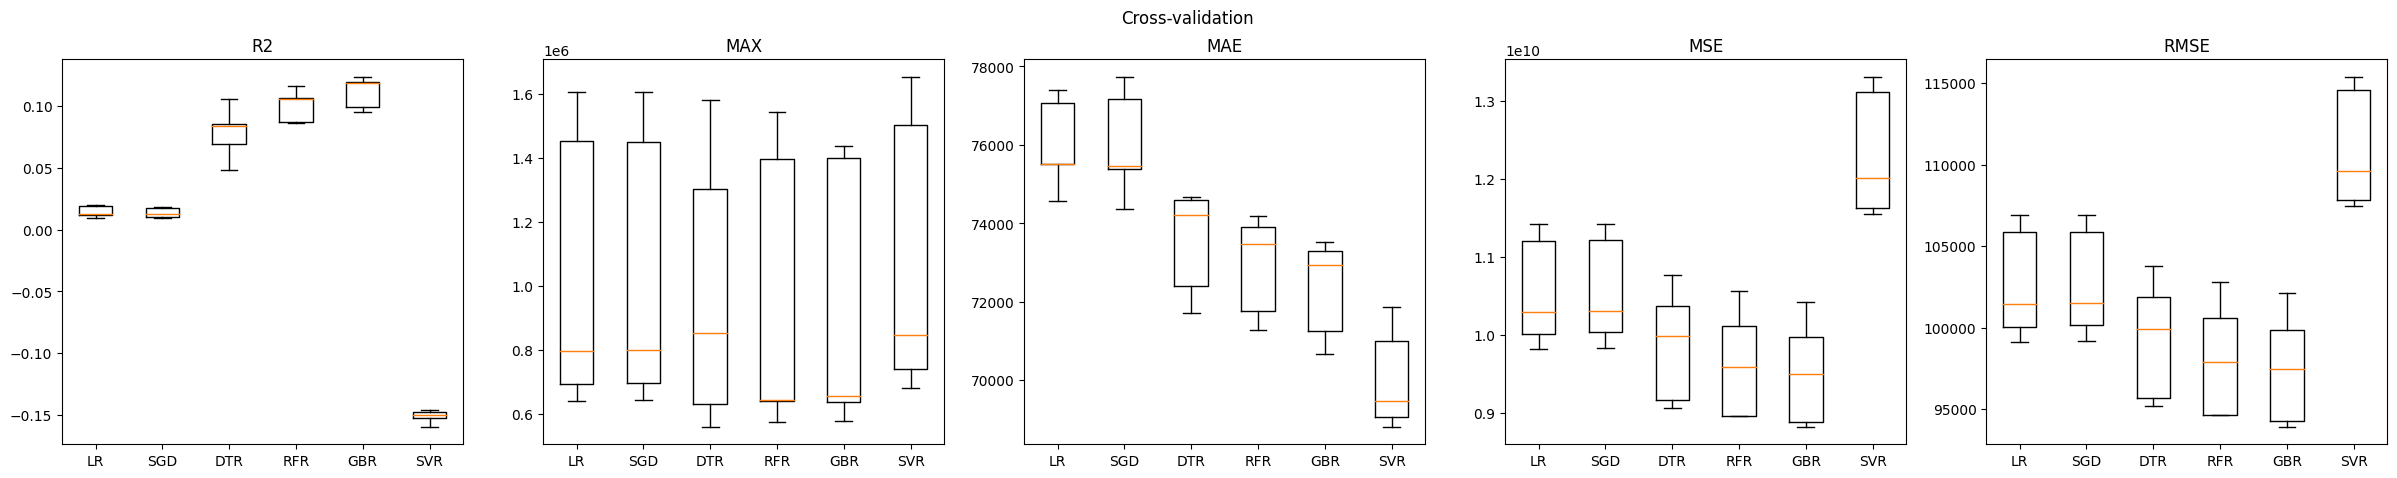

In [371]:
r2_values = []
max_error_values = []
neg_mean_absolute_error_values = []
neg_mean_squared_error_values = []
neg_root_mean_squared_error_values = []

for name, est in estimators:

  score = cross_validate(est, X_train, y_train, cv=5,
                         scoring=['r2', 'max_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_root_mean_squared_error'],
                         n_jobs=-1)


  r2_values.append(score['test_r2'])
  max_error_values.append(-score['test_max_error'])
  neg_mean_absolute_error_values.append(-score['test_neg_mean_absolute_error'])
  neg_mean_squared_error_values.append(-score['test_neg_mean_squared_error'])
  neg_root_mean_squared_error_values.append(-score['test_neg_root_mean_squared_error'])


fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(30, 5))

names = ['LR', 'SGD', 'DTR', 'RFR', 'GBR', 'SVR']

axs[0].boxplot(r2_values, labels=names)
axs[0].set_title('R2')
axs[1].boxplot(max_error_values, labels=names)
axs[1].set_title('MAX')
axs[2].boxplot(neg_mean_absolute_error_values, labels=names)
axs[2].set_title('MAE')
axs[3].boxplot(neg_mean_squared_error_values, labels=names)
axs[3].set_title('MSE')
axs[4].boxplot(neg_root_mean_squared_error_values, labels=names)
axs[4].set_title('RMSE')

plt.suptitle('Cross-validation')
plt.show()
